## Build a Discrete time signal

In [86]:
# Import the usual suspects
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal 
from scipy.fftpack import fft, fftfreq, fftshift, ifft

In [87]:
# show result from all calculations of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [88]:
def signal(freq = 10, fs = 8, noiseavg=0, noisestd=1, noise = True):
    time = np.linspace(0,1,fs)
    signal = np.cos(2*np.pi*freq*time)
    if noise:
        noise = 0.2*np.random.normal(noiseavg, noisestd, fs)
        signal = signal + noise
    return time, signal


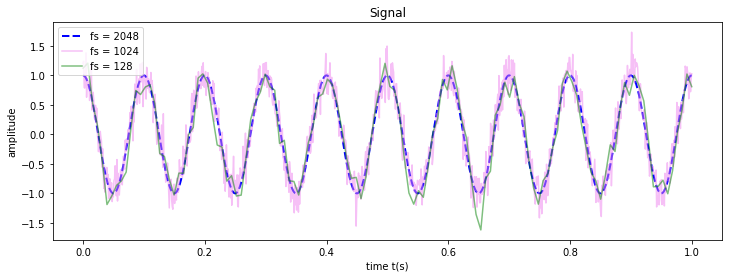

In [89]:
fig = plt.figure(figsize = (12,4))
fs = 2048 #High sampling pure signal
plt.plot(*signal(fs = fs, noise = False),
         linewidth = 2, 
         linestyle = "dashed",
         color = "blue",
         label = "fs = {}".format(fs))
fs = 1024 # high sample noisy signal
plt.plot(*signal(fs = fs),
         alpha = 0.5, 
         color = "violet",
         label = "fs = {}".format(fs))
fs = 128 # low sample noisi signal
plt.plot(*signal(fs = fs),
         alpha = 0.5,
         color = "green",
         label = "fs = {}".format(fs))
plt.xlabel("time t(s)")
plt.ylabel("amplitude")
plt.title("Signal")
plt.legend(loc="upper left")
plt.show();

In [120]:
def convolve(a, b):
    N1 = len(a)
    N2 = len(b)
    A = np.pad(a, (0, N2), 'constant', constant_values=(0))
    B = np.pad(b, (0, N1), 'constant', constant_values=(0))
    S = np.convolve(A,B, mode = "full")
    S = S[N2-1:N1+N2-1]/np.sum(b)
    
    return S

def fft_convolve(a,b):
    N1 = len(a)
    N2 = len(b)
    A = np.pad(a, (0, N2), 'constant', constant_values=(0))
    B = np.pad(b, (0, N1), 'constant', constant_values=(0))
    A_F = np.fft.fft(A)
    B_F = np.fft.fft(B)
    S = np.fft.ifft(A_F*B_F)
    S = S[N2-1:N1+N2-1].real/np.sum(b)
    
    return S 

def fft_signal(fs):
    S1 = np.abs(np.fft.fftshift(np.fft.fft(signal(fs = fs)[1])))
    freqs1 = np.fft.fftshift(np.fft.fftfreq(len(S1))) * fs
    
    return freqs1, S1

def spectralResponse(fs):
    freqs, SS = fft_signal(fs)
    SS = 20*np.log10(SS/SS.max())
    
    return freqs, SS
                

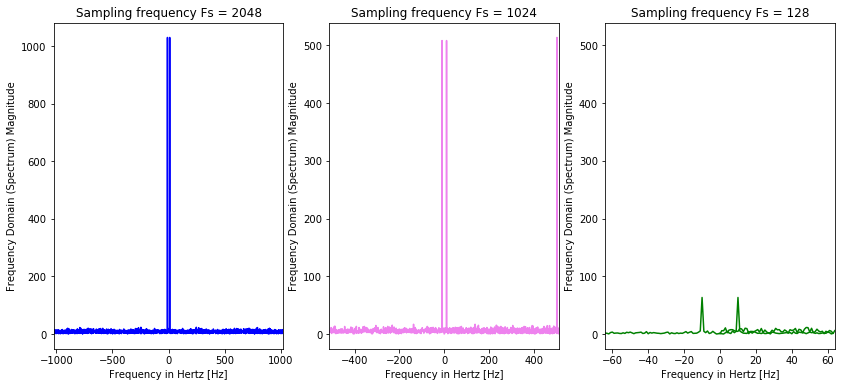

In [107]:
fig, ax = plt.subplots(ncols = 3, figsize = (14,6))
fs=2048
ax[0].plot(*fft_signal(fs), color = "blue")
ax[0].set_xlabel('Frequency in Hertz [Hz]')
ax[0].set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax[0].set_title('Sampling frequency Fs = {}'.format(fs))
ax[0].set_xlim(-fs/2, fs/2)
fs=1024
ax[1].plot(*fft_signal(fs), S2, color = "violet")
ax[1].set_xlabel('Frequency in Hertz [Hz]')
ax[1].set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax[1].set_title('Sampling frequency Fs = {}'.format(fs))
ax[1].set_xlim(-fs/2, fs/2)
fs=128
ax[2].plot(*fft_signal(fs), S2, color = "green")
ax[2].set_xlabel('Frequency in Hertz [Hz]')
ax[2].set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax[2].set_title('Sampling frequency Fs = {}'.format(fs))
ax[2].set_xlim(-fs/2, fs/2)
plt.show();

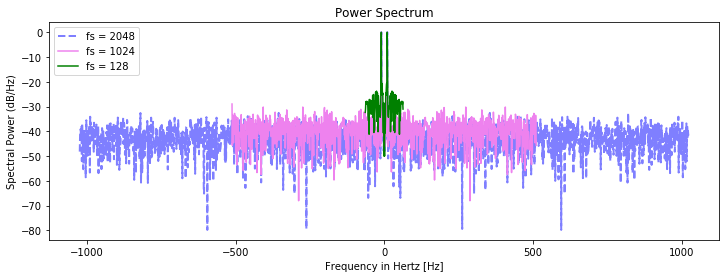

In [125]:
fig = plt.figure(figsize=(12,4))
fs = 2048
plt.plot(*spectralResponse(fs), color = "blue", linewidth = 2, 
         linestyle = "dashed", label = "fs = {}".format(fs), alpha = .5)
fs = 1024
plt.plot(*spectralResponse(fs), color = "violet", label = "fs = {}".format(fs))
fs = 128
plt.plot(*spectralResponse(fs), color = "green", label = "fs = {}".format(fs))
plt.legend(loc="upper left")
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Spectral Power (dB/Hz)')
plt.title("Power Spectrum")
plt.show();

## Build your window

/opt/conda/envs/cosmos3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


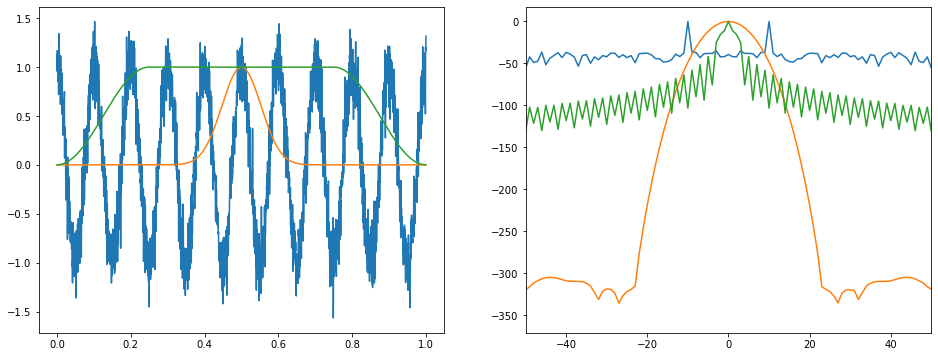

In [208]:
#signal.get_window(('kaiser', 4.0), fs)
#signal.get_window('tukey', fs)
def window(tipo, fs):
    if tipo == "kaiser":
        win = sp.signal.kaiser(fs, beta = 90)
    elif tipo == "tukey":
        win = sp.signal.tukey(fs)
    else:
        raise ValueError
    return win

def Filter(tipo, fs):
    if tipo == "kaiser":
        win = sp.signal.kaiser(fs, beta = 90)
    elif tipo == "tukey":
        win = sp.signal.tukey(fs)
    else:
        raise ValueError
    SS = np.abs(np.fft.fftshift(np.fft.fft(win)))    
    SS = 20*np.log10(SS/SS.max())
    return SS


fig, ax = plt.subplots(ncols = 2, figsize = (16,6))
fs=2048
time, sig = signal(fs=fs) 
ax[0].plot(time, sig)
ax[0].plot(time, window("kaiser",fs))
ax[0].plot(time, window("tukey", fs))
freqs, SS = spectralResponse(fs)
ax[1].plot(freqs, SS)
ax[1].plot(freqs, Filter("kaiser", fs))
ax[1].plot(freqs, Filter("tukey", fs))
ax[1].set_xlim(-50,50)
plt.show();

## Convolution Theorem

In [209]:
a = np.random.random(8)
b = np.random.random(5)
np.allclose(convolve(a,b),fft_convolve(a,b))

True

In [159]:
fs = 1024
a = signal(fs)[1]
b = window("kaiser", fs)
np.allclose(convolve(a,b),fft_convolve(a,b))

True

## Convolution

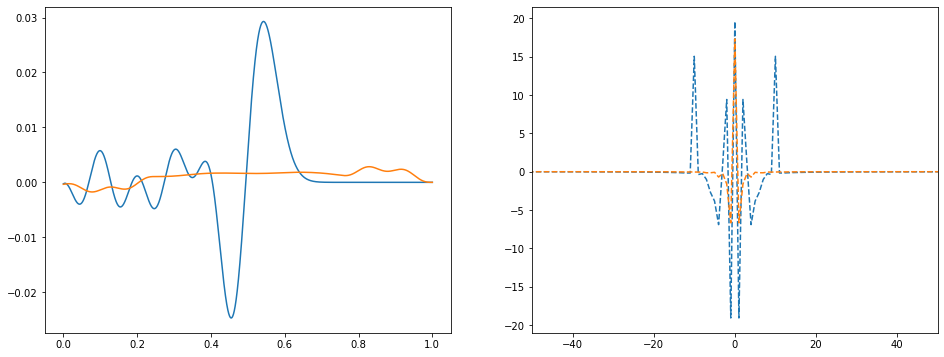

In [214]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,6))
fs=8*2048
time, sig = signal(fs=fs) 
ax[0].plot(time, convolve(sig, window('kaiser', fs)))
ax[0].plot(time, convolve(sig, window('tukey', fs)))
freqs, SS = spectralResponse(fs)
ax[1].plot(freqs, np.fft.fftshift(np.fft.fft(
                        convolve(sig, window('kaiser', fs)))).real,linestyle = "dashed")
ax[1].plot(freqs, np.fft.fftshift(np.fft.fft(
                        convolve(sig, window('tukey', fs)))).real,linestyle = "dashed")
ax[1].set_xlim(-50,50)
plt.show();

In [211]:
np.allclose(convolve(signal1,window1),fft_convolve(signal1,window1))
np.allclose(convolve(signal2,window2),fft_convolve(signal2,window2))

True

True